## Ankle Calculation
With this Notebook we read out the Data from every .csv-File in the given directory (csv_files), store it into DFs and visulize it. 

* We calculate Frames for potential Steps. 
* We calculate Angles for differrent Joints.
* We evaluate those angles
* We visaulize results

Requirements
* .csv-Files

In [1748]:
csvFilesPath = os.getcwd()+"/csv_files/finalCsv/"
csvFiles = os.listdir(csvFilesPath)
for fileName in csvFiles:
    pre, ext = os.path.splitext(fileName)
    print(pre)

Gehen_1
Gehen_4
Gehen_5
Gehen_7
Joggen_1
Joggen_4
Joggen_5
Joggen_7
Laufen_1
Laufen_4
Laufen_5
Laufen_7


In [1749]:
RUN = "Gehen_1" 
#Joggen 3Joggen 9Laufen 2Laufen 6Laufen 8Laufen 9Laufen 10

## Setup

In [1750]:
import os
import pandas as pd
import numpy as np
import warnings
import pickle
import statistics
warnings.filterwarnings('ignore')

### Get Data
* Reading Data from all CSV Files and save it to multiple Dataframes. 
* Storing every df into a Dictionary for further purposes

In [1751]:
df_dict_all = {}

csvFilesPath = os.getcwd()+"/csv_files/finalCsv/"
csvFiles = os.listdir(csvFilesPath)

for fileName in csvFiles:
    #print(fileName)
    pre, ext = os.path.splitext(fileName)
    file = csvFilesPath + fileName

    # if "Joggen" in pre:
    #     df = pd.read_csv(file)
    #     df_dict_all[pre] = df
    #     if len(df) < 1798:
    #         print(pre)

    df = pd.read_csv(file)
    df_dict_all[pre] = df
    if len(df) < 1798:
        print(pre)

amountDataframes = len(df_dict_all)
amountColumns = len(df.columns.tolist())
amountRows = len(df)
amountData = amountDataframes*amountColumns*amountRows

print(f'{amountDataframes} DataFrames')
print(f'{amountColumns} columns per Dataframe ')
print(f'{amountRows} rows per Dataframe')
print(f'{amountData} DataCells')

12 DataFrames
41 columns per Dataframe 
1799 rows per Dataframe
885108 DataCells


In [1752]:
df_dict_all.keys()

dict_keys(['Gehen_1', 'Gehen_4', 'Gehen_5', 'Gehen_7', 'Joggen_1', 'Joggen_4', 'Joggen_5', 'Joggen_7', 'Laufen_1', 'Laufen_4', 'Laufen_5', 'Laufen_7'])

In [1753]:
df = df_dict_all[RUN]
df.columns
df = df * -1
df = df + 1
df.head()

,Unnamed: 0,x_left_hip,y_left_hip,z_left_hip,v_left_hip,x_right_hip,y_right_hip,z_right_hip,v_right_hip,x_left_knee,...,z_right_heel,v_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,v_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index,v_right_foot_index
0,1,0.442414,0.528015,0.556328,0.000746,0.414328,0.529584,0.429621,0.002806,0.467017,...,0.480119,0.390377,0.484166,0.217060,0.534731,0.067404,0.522063,0.228073,0.468925,0.387086
1,0,0.443097,0.527245,0.547538,0.000744,0.389280,0.527222,0.455257,0.002663,0.509351,...,0.472898,0.367388,0.625993,0.239226,0.537312,0.069397,0.411603,0.213873,0.468388,0.368478
2,-1,0.430396,0.521282,0.543833,0.000722,0.386546,0.520914,0.467429,0.002516,0.505629,...,0.465365,0.341087,0.569928,0.236761,0.542273,0.065035,0.452230,0.214695,0.469677,0.339562
3,-2,0.401234,0.511013,0.564170,0.000665,0.405057,0.510985,0.461438,0.002319,0.328607,...,0.456473,0.313325,0.333863,0.210822,0.547105,0.059081,0.742261,0.259073,0.469315,0.307856
4,-3,0.390046,0.507887,0.563671,0.000614,0.418230,0.509059,0.447222,0.002128,0.272070,...,0.456903,0.286596,0.282156,0.205101,0.567079,0.053564,0.781008,0.267607,0.470620,0.278393


## Analyse und Visualisierung

### Bestimmung des Zeitpunkts der Winkelberechnung

### Vergleich meherer Gelenkpunkte 
* seitliche Ansicht und y-Bewegung zur Feststellung des Zeitpunkts für die Berechnung des Winkels
* hintere Ansicht und x-Bewegung zur Berechnung des Winkels

In [1754]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl

joints_x = ["z_left_knee", "z_left_ankle", "z_left_heel"]
joints_y = ["y_left_heel", "y_left_foot_index"]

fig_knee = px.line(df, y="y_left_heel", title='Position Rückfußwinkel')
fig_ankle = px.line(df, y="y_left_foot_index")
fig_ankle.update_traces(line= dict(
    color = "green"
))

fig_knee.add_trace(fig_ankle.data[0], )
fig_knee.show()

ERKENTNISSE: Vorgehen für Berechnung des Zeitpunkts

Wie erkennt das modell die richtigen Abschnitte???
* Erkennen wann Ferse aufsetzt
* Erkennen wann Fußspitze ferse schneidet

evtl. mithilfe der Außschläge herausfinden in welchem Frameabschnitte die genannten ereignisse auftreten


 *Auffällig: das Muster lässt eigentlich vermuten, dass die Werte vermutlich spiegelverkehrt sind * 


In [1755]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl

joints_x = ["z_left_knee", "z_left_ankle", "z_left_heel"]
joints_y = ["y_left_heel", "y_left_foot_index"]
#df_backRight = df[backAnkleRight]

fig_knee = px.line(df, y="z_left_knee", title='Position Rückfußwinkel')
fig_ankle = px.line(df, y="z_left_ankle")
fig_heel = px.line(df, y="z_left_heel")
fig_heel_side = px.line(df, y="y_left_heel")

fig_ankle.update_traces(line= dict(
    color = "green"
))
fig_heel.update_traces(line= dict(
    color = "orange"
))
fig_heel_side.update_traces(line= dict(
    color = "red"
))
fig_knee.add_trace(fig_ankle.data[0], )
fig_knee.add_trace(fig_heel.data[0], )
fig_knee.add_trace(fig_heel_side.data[0], )

fig_knee.show()

## Functions for Calculation

In [1756]:
def getPointsForAngleDirection(x_points,y_points):
        for i, y in enumerate(y_points):
            if y == max(y_points):
                x = x_points[i]
                return (x,y)


def intersection_points(slope, intercept, x0, y0, radius):
    x_points = []
    y_points = []

    a = 1 + slope**2
    b = -2.0*x0 + 2*slope*(intercept - y0)
    c = x0**2 + (intercept-y0)**2 - radius**2
 
    delta = b**2 - 4.0*a*c  
    x1 = (-b + np.sqrt(delta)) / (2.0 * a)
    x2 = (-b - np.sqrt(delta)) / (2.0 * a)
 
    x_points.append(x1)
    x_points.append(x2)
 
    y1 = slope*x1 + intercept
    y2 = slope*x2 + intercept
 
    y_points.append(y1)
    y_points.append(y2)
 
    return x_points, y_points

def get_angle(x, y, x0, y0, radius):
 
    base = x - x0
    hypotenuse = radius
    theta = np.arccos(base / hypotenuse)
    if y-y0 < 0:
        theta = 2*np.pi - theta
    return theta

import matplotlib.pyplot as plt
import numpy as np

def calcAngle(frame):

    knee_x = df["z_left_knee"][frame]
    knee_y = df["y_left_knee"][frame]
    ankle_x = df["z_left_ankle"][frame]
    ankle_y = df["y_left_ankle"][frame]
    heel_x = df["z_left_heel"][frame]
    heel_y = df["y_left_heel"][frame]

    foot_y = df["y_left_foot_index"][frame]

    a1, b1 = (ankle_y-knee_y)/(ankle_x-knee_x), knee_y-(ankle_y-knee_y)/(ankle_x-knee_x)*knee_x
    a2, b2 = (heel_y-ankle_y)/(heel_x-ankle_x), ankle_y-(heel_y-ankle_y)/(heel_x-ankle_x)*ankle_x

    x0 = (b2-b1)/(a1-a2)
    y0 = a1*x0 + b1

    r = 0.2
    
    x_points1, y_points1 = intersection_points(a1, b1, x0, y0, r)
    x_points2, y_points2 = intersection_points(a2, b2, x0, y0, r)

    blueLinePointAbove = getPointsForAngleDirection(x_points1, y_points1)
    orangeLinePointAbove = getPointsForAngleDirection(x_points2, y_points2)
    
    #If blue line starts left from orange line (above) the angle should be negative
    supination = False
    if blueLinePointAbove[0] > orangeLinePointAbove[0]:
        supination = True

    x_points = x_points1+ x_points2
    y_points = y_points1+ y_points2

    theta_list = []

    for i in range(len(x_points)):
        x = x_points[i]
        y = y_points[i]
    
        theta_list.append(get_angle(x, y, x0, y0, r))

    if knee_x  > ankle_x:
        if ankle_x < heel_x and ankle_y > heel_y:

            p1 = theta_list[1]
            p2 = theta_list[2]

        if ankle_x < heel_x and ankle_y < heel_y:
            # print(2)
            p1 = theta_list[3]
            p2 = theta_list[1]
            # p1 = theta_list[1]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund
        if ankle_x > heel_x and ankle_y > heel_y:
            # print(3)
            p1 = theta_list[3]
            p2 = theta_list[1]
        if ankle_x > heel_x and ankle_y < heel_y:
            # print(4)
            p1 = theta_list[3]
            p2 = theta_list[1]
    else:
        if ankle_x > heel_x and ankle_y > heel_y:
            # print(5)
            p1 = theta_list[3]
            p2 = theta_list[0]
            # supination = True
        if ankle_x > heel_x and ankle_y < heel_y:
            # print(6)
            p1 = theta_list[2]
            p2 = theta_list[0]
        if ankle_x < heel_x and ankle_y > heel_y:
            # print(7)
            p1 = theta_list[0]
            p2 = theta_list[2]
        if ankle_x < heel_x and ankle_y < heel_y:
            # print(8)
            p1 = theta_list[3]
            p2 = theta_list[0]
            # p1 = theta_list[0]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund
        
    angle_in_degree = round(np.rad2deg(abs(p1-p2)), 1)

    if supination == True:
        angle_in_degree = angle_in_degree*-1
    return angle_in_degree

import matplotlib.pyplot as plt
import numpy as np

def drawAngle(frame, printMode = True):
    knee_x = df["z_left_knee"][frame]
    knee_y = df["y_left_knee"][frame]
    ankle_x = df["z_left_ankle"][frame]
    ankle_y = df["y_left_ankle"][frame]
    heel_x = df["z_left_heel"][frame]
    heel_y = df["y_left_heel"][frame]

    foot_y = df["y_left_foot_index"][frame]

    a1, b1 = (ankle_y-knee_y)/(ankle_x-knee_x), knee_y-(ankle_y-knee_y)/(ankle_x-knee_x)*knee_x
    a2, b2 = (heel_y-ankle_y)/(heel_x-ankle_x), ankle_y-(heel_y-ankle_y)/(heel_x-ankle_x)*ankle_x

    l = np.linspace(-6, 6, 100)
    
    plt.figure(figsize=(8, 8))
    plt.ylim(0, 1)
    plt.xlim(0, 1)
    plt.title('Plot an angle using Python')
    plt.plot(l, l*a1+b1)
    plt.plot(l, l*a2+b2)
    
    x0 = (b2-b1)/(a1-a2)
    y0 = a1*x0 + b1
    plt.scatter(x0, y0, color='midnightblue')

    plt.scatter(knee_x, knee_y, color='blue')
    plt.scatter(ankle_x, ankle_y, color='green')
    plt.scatter(heel_x, heel_y, color='violet')
    plt.text(knee_x, knee_y, 'knee', color='blue')
    plt.text(ankle_x, ankle_y, 'ankle', color='green')
    plt.text(heel_x, heel_y, 'heel', color='violet')

    plt.axhline(y=foot_y, color='black', linestyle='dotted')
    #plt.text(foot_y, 0, 'heel', color='violet')

    theta = np.linspace(0, 2*np.pi, 100)
    r = 0.2
    x1 = r * np.cos(theta) + x0
    x2 = r * np.sin(theta) + y0
    plt.plot(x1, x2, color='green', linestyle='dotted')

    x_points1, y_points1 = intersection_points(a1, b1, x0, y0, r)
    x_points2, y_points2 = intersection_points(a2, b2, x0, y0, r)

    blueLinePointAbove = getPointsForAngleDirection(x_points1, y_points1)
    orangeLinePointAbove = getPointsForAngleDirection(x_points2, y_points2)
    
    supination = False
    if blueLinePointAbove[0] > orangeLinePointAbove[0]:
        supination = True
    
    x_points = x_points1+ x_points2
    y_points = y_points1+ y_points2
    
    plt.scatter(x_points[1], y_points[1], color='crimson')
    plt.scatter(x_points[2], y_points[2], color='crimson')
    plt.scatter(x_points[3], y_points[3], color='crimson')
    plt.scatter(x_points[0], y_points[0], color='crimson')
    
    plt.text(x_points[1], y_points[1], '  P1', color='black')
    plt.text(x_points[2], y_points[2], '  P2', color='black')
    plt.text(x_points[3], y_points[3], '  P3', color='black')
    plt.text(x_points[0], y_points[0], '  P0', color='black')
    
    theta_list = []
    
    for i in range(len(x_points)):
        x = x_points[i]
        y = y_points[i]
        theta_list.append(get_angle(x, y, x0, y0, r))

    if knee_x  > ankle_x:
        if ankle_x < heel_x and ankle_y > heel_y:
            # print(1)
            p1 = theta_list[1]
            p2 = theta_list[2]

        if ankle_x < heel_x and ankle_y < heel_y:
            # print(2)
            p1 = theta_list[3]
            p2 = theta_list[1]
            # p1 = theta_list[1]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund
        if ankle_x > heel_x and ankle_y > heel_y:
            # print(3)
            p1 = theta_list[3]
            p2 = theta_list[1]
        if ankle_x > heel_x and ankle_y < heel_y:
            # print(4)
            p1 = theta_list[3]
            p2 = theta_list[1]
    else:
        if ankle_x > heel_x and ankle_y > heel_y:
            # print(5)
            p1 = theta_list[3]
            p2 = theta_list[0]

        if ankle_x > heel_x and ankle_y < heel_y:
            # print(6)
            p1 = theta_list[2]
            p2 = theta_list[0]
        if ankle_x < heel_x and ankle_y > heel_y:
            # print(7)
            p1 = theta_list[0]
            p2 = theta_list[2]
            print(theta_list[3])

        if ankle_x < heel_x and ankle_y < heel_y:
            # print(8)
            p1 = theta_list[3]
            p2 = theta_list[0]
            # p1 = theta_list[0]
            # p2 = theta_list[2] --> hat nicht funktioniert aus irgendeinem grund

    theta = np.linspace(p1, p2, 100)
    
    x1 = r * np.cos(theta) + x0
    x2 = r * np.sin(theta) + y0
    
    plt.plot(x1, x2, color='black')
    
    mid_angle = (p1 + p2) / 2.0
    
    x_mid_angle = (r-0.5) * np.cos(mid_angle) + x0
    y_mid_angle = (r-0.5) * np.sin(mid_angle) + y0
    
    angle_in_degree = round(np.rad2deg(abs(p1-p2)), 1)

    # Angle negative
    if supination == True:
        angle_in_degree = angle_in_degree*-1
    
    plt.text(x_mid_angle, y_mid_angle, angle_in_degree, fontsize=12)
    
    plt.scatter(x_points[1], y_points[1], color='red')
    plt.scatter(x_points[2], y_points[2], color='red')
    plt.scatter(x_points[3], y_points[3], color='red')
    plt.scatter(x_points[0], y_points[0], color='red')

    if printMode == True:
        plt.show()


def checkThresholds(i, step_average, printMode=True):
    result = ""
    if step_average >= THRESHOLD_PRONATION[0] and step_average <= THRESHOLD_PRONATION[1]:
        pronation_list.append(frame_list_all[i])
        result = "Pronation"

    elif step_average > THRESHOLD_PRONATION_STRONG:
        pronation_strong_list.append(frame_list_all[i])
        result = "Strong Pronation"
    
    elif step_average <= THRESHOLD_SUPINATION:
        supination_list.append(frame_list_all[i])
        result = "Supination"
    else:
        neutral_list.append(frame_list_all[i])
        result = "Neutral"

    if printMode == True:
        print(f'{result} in Frames {frame_list_all[i]} with a Mean Angle of {np.round(step_average,2)}')

    return result

def green(txt):
    return f"\x1b[32m{txt}\x1b[0m"
def red(txt):
    return f"\x1b[31m{txt}\x1b[0m"
def blue(txt):
    return f"\x1b[36m{txt}\x1b[0m"
def bold(txt):
        return f"\x1b[1m{txt}\x1b[0m"

def saveAnalysis(run, model_obj):
    an_obj = model_obj
    file = open("analysis_results/"+run, "wb")
    pickle.dump(an_obj, file)
    file.close()

def loadAnalysis(run):
    file_to_read = open("analysis_results/"+run, "rb")
    loaded_object = pickle.load(file_to_read)
    file_to_read.close()
    #print(loaded_object)
    return loaded_object


## Bestimmung der Frames des Auftritts

Alle Geschwindigkeiten der Läufer: 1, 4, 5, 7 

Detecting Frames where Foot_index_y higher or similar to heel_y

In [1757]:
frame_list_all = []
frame_list_step = []

for frame in range(0, len(df)):

    knee_x = df["z_left_knee"][frame]
    knee_y = df["y_left_knee"][frame]
    ankle_x = df["z_left_ankle"][frame]
    ankle_y = df["y_left_ankle"][frame]
    heel_x = df["z_left_heel"][frame]
    heel_y = df["y_left_heel"][frame]

    foot_y = df["y_left_foot_index"][frame]

    if foot_y >= heel_y:
        if frame_list_step == []:
            frame_list_step.append(frame)
        else:
            if frame_list_step[-1] == frame-1:
                frame_list_step.append(frame)
            else:
                if len(frame_list_step) > 2:
                    frame_list_all.append(frame_list_step)
                    frame_list_step = [frame] 
                else:
                    frame_list_step = [frame] 

print(f'{bold(blue(len(frame_list_all)))} valid steps were detected\nExamples:')
print(frame_list_all[:5])


61 valid steps were detected
Examples:
[[16, 17, 18, 19, 20, 21, 22, 23], [46, 47, 48, 49, 50, 51, 52], [75, 76, 77, 78, 79, 80, 81, 82], [105, 106, 107, 108, 109, 110, 111], [134, 135, 136, 137, 138, 139, 140, 141]]


## Foot Attachment Pattern

Umsetzung:
* Idee1: Analyse der x-Position (Seitliche Ansicht) Fußspitze bzw. der Ferse
--> Wenn der Aufsetztende Fuß am weitesten Vorne ist (pro Intervall) sollte das Aufsetzen des Fußes kurz bevorstehen
* Idee2: Analyse der y-Position (Seitliche Ansicht) der Fußspitze bzw. Ferse kurz vor dem schon vorher errchneten ersten Frames für jeden Schritt. --> Bsp.: [16,17,18, ...] Frame 15 hat einen nidriegeren y Wert bei Fußspitze oder Ferse? --> Wenn Ferse dann Fersenauftritt.

> Berechnung des Musters hat leider keine aussagekräftigen Erkentnisse ergeben. (Aufwand war für die "verfügbaren Kapazitäten.." nicht mehr umsetzbar leider)

In [1758]:
##
result_foot_pattern = ""
# for step in frame_list_all:
#     frame_now = step[0]
#     frame_pre = frame_now-1

#     heel_y = df["y_left_heel"][frame_now]
#     foot_y = df["y_left_foot_index"][frame_now]
#     if heel_y > foot_y:
#         print(f'footwalk {np.round(heel_y,3)} > {np.round(foot_y, 3)}')
#     elif heel_y < foot_y:
#         print(f'heelwalk {np.round(heel_y,3)} < {np.round(foot_y, 3)}')
#     else:
#         print(f'neutral walk {np.round(heel_y, 3)} = {np.round(foot_y, 3)}')  

# result_foot_pattern = ""
# for step in frame_list_all:
#     frame_range = range(step[0]-2,  step[-1])

#     heel_y_min = df["y_left_heel"][frame_range].min()
#     frame_now = df["y_left_heel"][frame_range][df["y_left_heel"][frame_range] == heel_y_min ].index[0]
#     print(frame_now)
#     print(step)
#     step = [s for s in step if s > frame_now]
#     print(step)

    # foot_y = df["y_left_foot_index"][frame_now]
    # if heel_y > foot_y:
    #     print(f'footwalk {np.round(heel_y,3)} > {np.round(foot_y, 3)}')
    # elif heel_y < foot_y:
    #     print(f'heelwalk {np.round(heel_y,3)} < {np.round(foot_y, 3)}')
    # else:
    #     print(f'neutral walk {np.round(heel_y, 3)} = {np.round(foot_y, 3)}')  

In [1759]:
# result_foot_pattern = ""
# frame_list_all_new = []
# for step in frame_list_all:
#     frame_range = range(step[0],  step[-1])

#     heel_x_min = df["x_left_heel"][frame_range].min()
#     frame_now = df["x_left_heel"][frame_range][df["x_left_heel"][frame_range] == heel_x_min ].index[0]
#     print(frame_now)
#     print(step)
#     step = [s for s in step if s <= frame_now]
#     frame_list_all_new.append(step)
#     print(step)
# frame_list_all_new = frame_list_all

## Angle Calculation 
Expanding DF with angles

In [1760]:
angle_list = []
for f in range(0,len(df)):
    angle = calcAngle(f)
    angle_list.append(angle)
df["angle"] = angle_list

Calculating Mean for each step every runner takes

In [1761]:
average_list_all = []

for frame_step in frame_list_all:
    average = df.loc[frame_step[0]:frame_step[-1]]["angle"].mean()
    average_list_all.append(average)

print("Average_list", np.round(average_list_all, 2))

Average_list [ -7.42  -8.13 -14.29  -9.8  -11.25 -15.59  -0.7   -5.56  -6.34 -17.41
 -10.19 -10.56  -9.43   7.03  -6.23 -12.76  -4.46  -8.76 -15.64  -6.29
  -1.36  -7.53 -11.18 -12.48  -6.8   -0.27 -11.57 -10.63 -10.7   -6.62
  -8.93 -10.09  -5.61  -7.06 -11.77 -10.21  -8.83  -8.09  -2.64 -27.19
 -13.96  -7.74  -4.55 -12.24  -5.51  -3.96  -7.99  -2.77  -2.25  -0.5
  -8.64  -0.86  -6.49  -4.    -3.96   8.26 -11.54 -13.29  -2.07  -2.64
   1.1 ]


Checking if Threshold of a step is crossed

In [1762]:
THRESHOLD_PRONATION = (10, 16.5)
THRESHOLD_PRONATION_STRONG = 16.5
THRESHOLD_SUPINATION = 3

pronation_list = []
pronation_strong_list = []
supination_list = []
neutral_list = []

for i, m in enumerate(average_list_all):
    result = checkThresholds(i, m, False)
    
print(f'\nPronation: {bold(len(pronation_list))}-times.')
print(f'Strong Pronation: {bold(len(pronation_strong_list))}-times.')
print(f'Supination: {bold(len(supination_list))}-times.')
print(f'Neutral: {bold(len(neutral_list))}-times.')


Pronation: 0-times.
Strong Pronation: 0-times.
Supination: 59-times.
Neutral: 2-times.


## Visulize Angles for X Frames

### Neutral

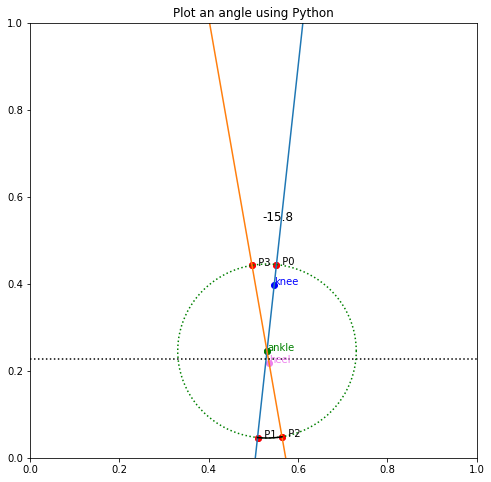

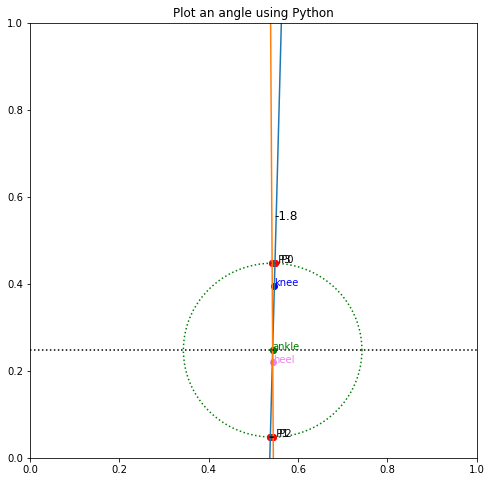

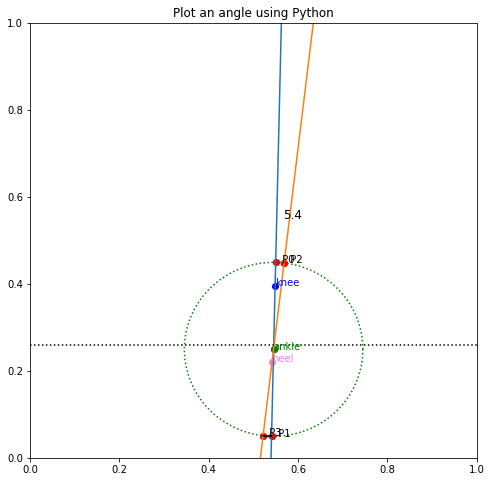

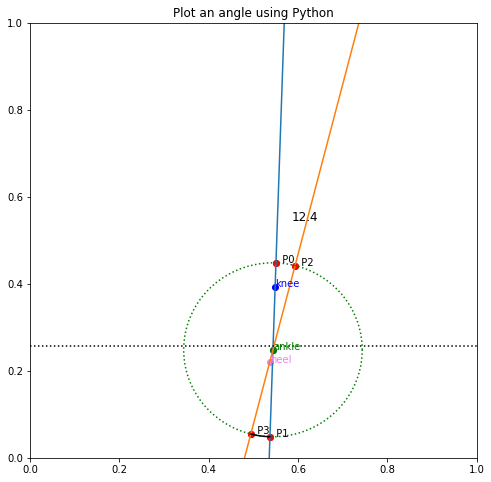

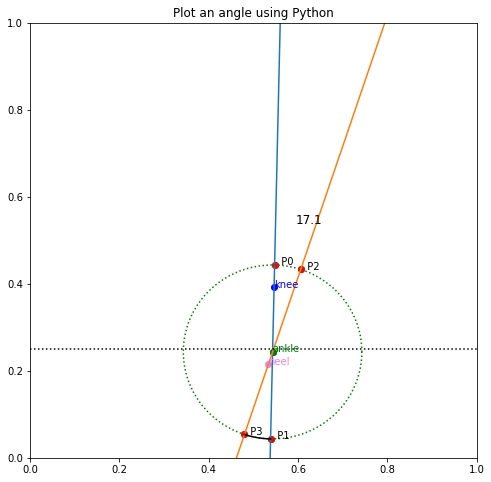

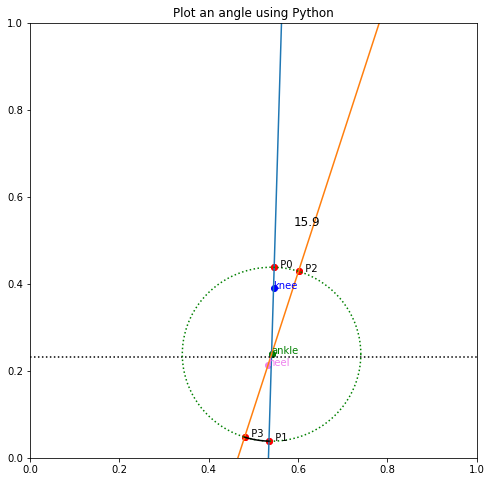

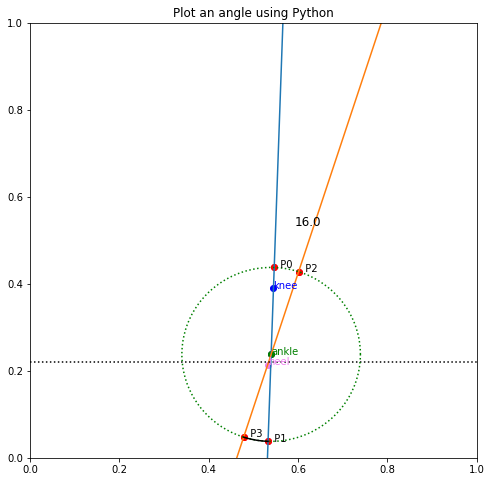

In [1763]:
# print("NEUTRAL FRAMES:")
# for i,frame_step in enumerate(neutral_list):
#     print(frame_step)
#     for f in frame_step:
#         drawAngle(f)
#     print("\n\n")
try:
    for f in neutral_list[0]:
        plot = drawAngle(f, False)
    print("\n\n")
except:
    print("No Values")



### Supination

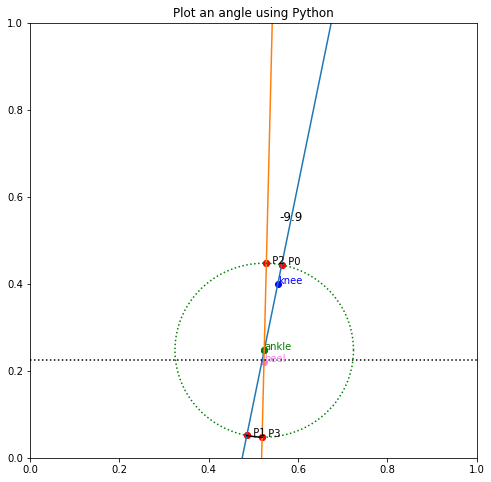

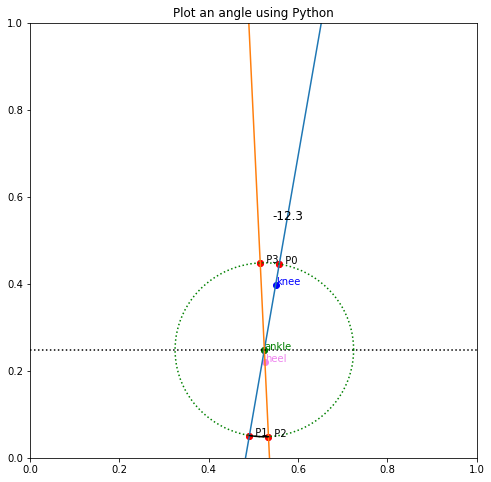

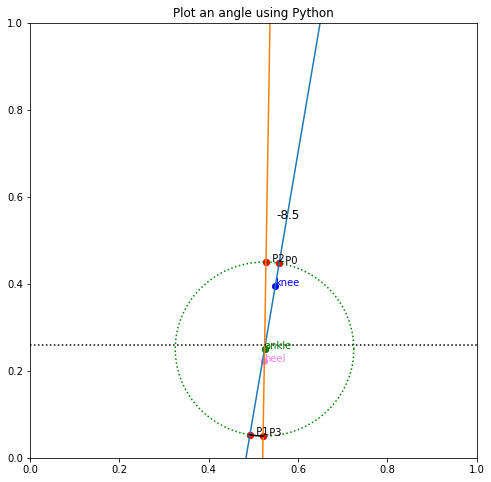

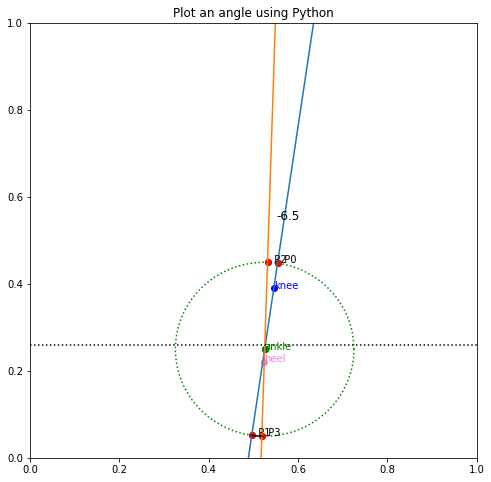

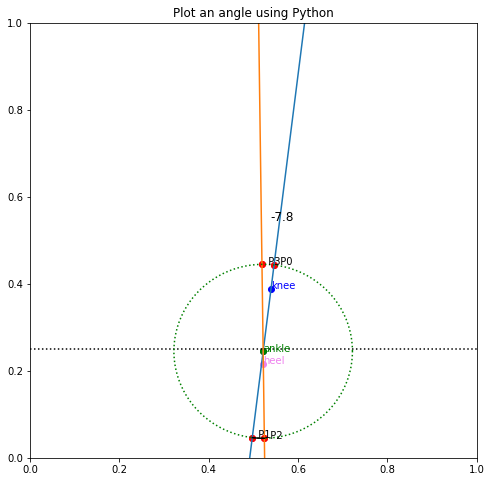

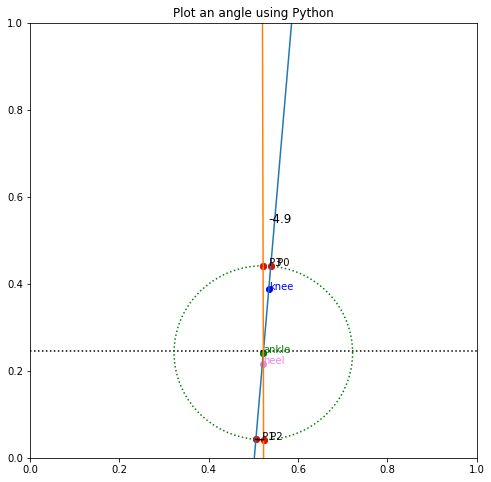

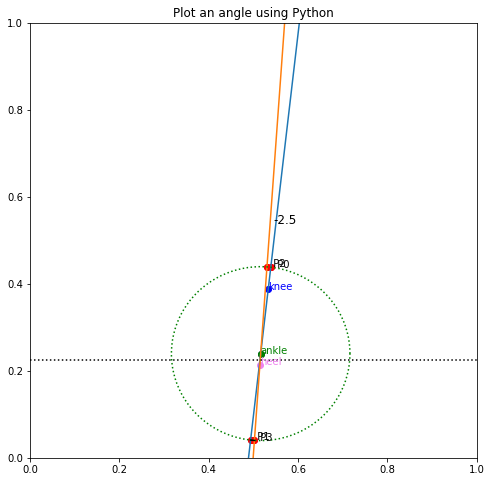

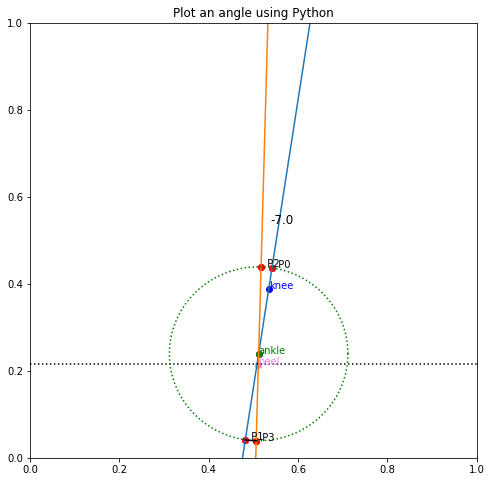

In [1764]:
# for i,frame_step in enumerate(supination_list):
#     print(frame_step)
#     for f in frame_step:
#         drawAngle(f)
#     print("\n\n")
try:
    for f in supination_list[0]:
        drawAngle(f)
    print("\n\n")
except:
    print("No Values")

### Pronation

In [1765]:
# for i,frame_step in enumerate(pronation_list):
#     print(frame_step)
#     for f in frame_step:
#         drawAngle(f)
#     print("\n\n")
try:
    for f in pronation_list[0]:
        drawAngle(f)
        print("\n\n")
except Exception as e:
    print(e)

list index out of range


### Strong Pronation

In [1766]:
# for i,frame_step in enumerate(pronation_strong_list):
#     print(frame_step)
#     for f in frame_step:
#         drawAngle(f)
#     print("\n\n")
try:
    for f in pronation_strong_list[0]:
        drawAngle(f)
        print("\n\n")
except:
    print("No Values")

No Values


### Winkel Verlauf

In [1767]:
import pandas as pd
import plotly.express as px
import matplotlib as mpl
df["angle"]

fig_knee = px.line(df, y="angle", title='Angle')

fig_knee.show()

## Analysis Result (1 Run)

In [1768]:
average_overall = sum(average_list_all) / len(average_list_all)
median = bold(statistics.median(np.round(average_list_all, 1)))
result_pronation_pattern = checkThresholds(0, average_overall, False)
print(f'The runners left foot has a average value of {blue(bold(np.round(average_overall, 2)))} degree at step-out.')
print(f'The Median of the averaged steps the Runner took is {blue(median)}.')
print(f'Thats considered as {blue(bold(result_pronation_pattern))}.')   

The runners left foot has a average value of -7.52 degree at step-out.
The Median of the averaged steps the Runner took is -7.7.
Thats considered as Supination.


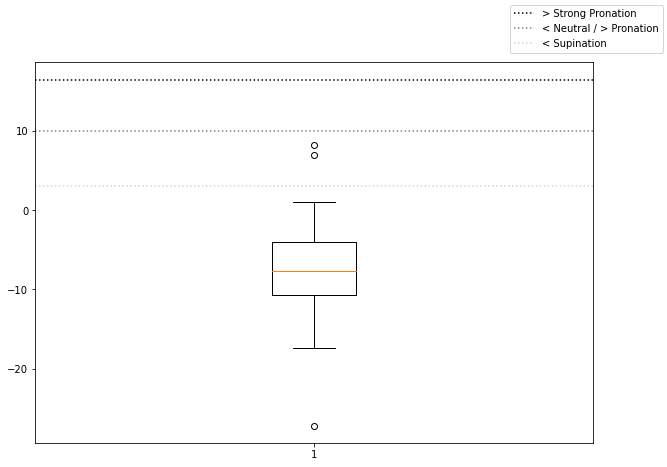

In [1769]:
fig = plt.figure(figsize =(10, 7))
 
plt.axhline(y=16.5, color='black', linestyle='dotted', label='> Strong Pronation')
plt.axhline(y=10, color='grey', linestyle='dotted', label='< Neutral / > Pronation')
plt.axhline(y=3, color='lightgrey', linestyle='dotted', label='< Supination')
plt.boxplot(average_list_all)
fig.legend()
plt.show()

## Save Analysis in File

In [1770]:
result_dict = {RUN: {"FOOT_PATTERN": result_foot_pattern, "PRONATION": {"PATTERN": result_pronation_pattern, "MEAN_ALL": average_overall,"MEAN_STEPS": average_list_all}}}
saveAnalysis(RUN, result_dict)

## Summary of all Run's

In [1771]:
run_list = []
for fileName in csvFiles:
    try:
        pre, ext = os.path.splitext(fileName)
        run = loadAnalysis(pre)
        run_list.append(run)
    except:
        print("Error")
len(run_list)

12

0
1
2
3
4
5
6
Error1:  'MEAN_ALL'
7
8
9
Error1:  'MEAN_ALL'
10
11


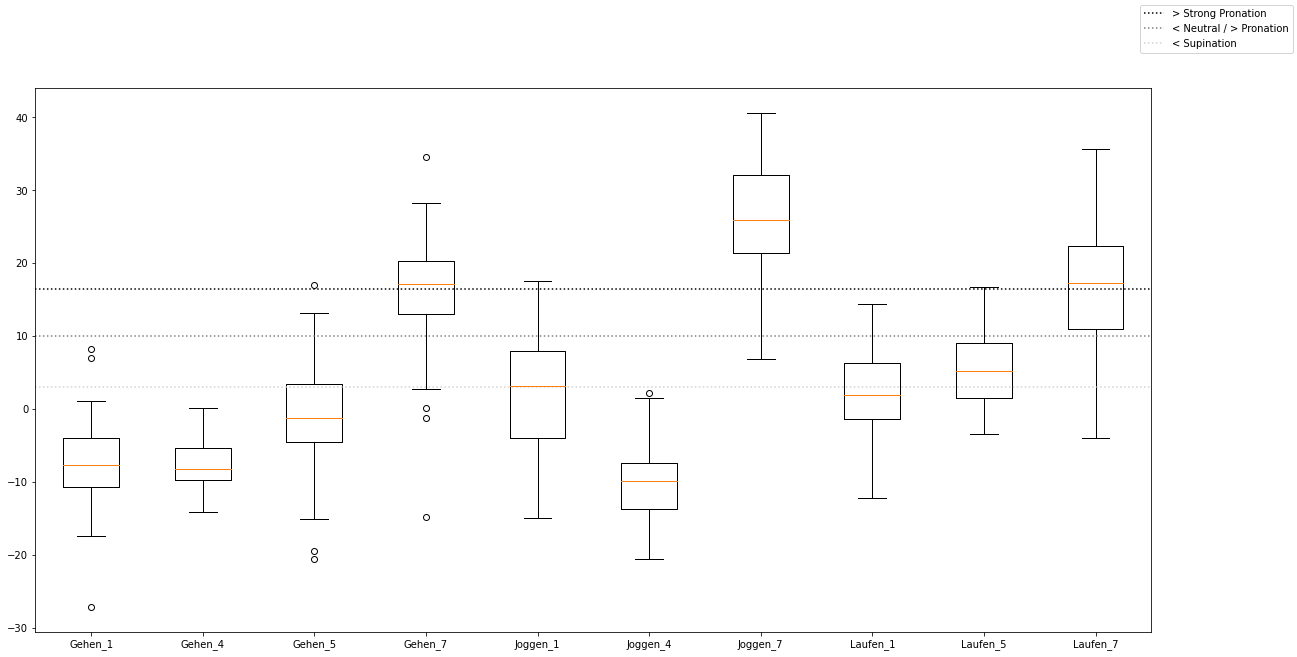

In [1772]:
step_dict = {}
for i, r in enumerate(run_list):
    try: 
        print(i)
        run_name = list(run_list[i].keys())[0]
        values = list(run_list[i].values())
        
        foot_pattern = values[0]["FOOT_PATTERN"]
        result = values[0]["PRONATION"]["PATTERN"]
        mean_all = values[0]["PRONATION"]["MEAN_ALL"]
        mean_steps = values[0]["PRONATION"]["MEAN_STEPS"]

        step_dict[run_name] = mean_steps

    except Exception as e:
        print("Error1: ", e)

try:
    #fig = plt.figure(figsize =(20, 10))
    fig, ax = plt.subplots(figsize =(20, 10))
    ax.boxplot(step_dict.values())
    ax.set_xticklabels(step_dict.keys())
    plt.axhline(y=16.5, color='black', linestyle='dotted', label='> Strong Pronation')
    plt.axhline(y=10, color='grey', linestyle='dotted', label='< Neutral / > Pronation')
    plt.axhline(y=3, color='lightgrey', linestyle='dotted', label='< Supination')
    fig.legend()
    plt.show()
except Exception as e:
    print("Error2: ", e)